### Dependencies

In [1]:
from classification import *

# Data Collection

## Varying positive negative feedback, Gd1 Gd2

In [ ]:
conditions = {
    'kd1': [0, 0.02, 0.04],
    'kd2': [0, 0.6, 1.2],
    'v_3k': [0, 0.05, 0.1, 0.2],
    'v_delta': [0, 0.005, 0.01, 0.02],
#     'v_pmca': [5, 8, 10],
#     'v_soc': [0, 0.75, 0.157],
#     'v_serca': [0, 0.45, 0.9]
}

t_f = 150
results_rows = []
trial_count = 0
peak_priority = True

set_init('poisson')
folder = 'data/ca_diversity/calibrated/'

combs = list(itertools.product([0.02], [1.2], conditions['v_3k'], conditions['v_delta'])) + \
        list(itertools.product(conditions['kd1'], conditions['kd2'], [0.1], [0.005]))
# for comb in itertools.product(conditions['kd1'], conditions['kd2'], conditions['v_3k'], conditions['v_delta']):
for comb in combs:
    cfg.kd1 = comb[0]
    cfg.kd2 = comb[1]
    cfg.v_3k = comb[2]
    cfg.v_delta = comb[3]
    
    file = f'kd1_{cfg.kd1}_kd2_{cfg.kd2}_v3k_{cfg.v_3k}_vdelta_{cfg.v_delta}'
    print(file)
    if file in os.listdir(folder):
        continue
    results_rows = diversity_experiment(calibrate=3)
    
    results = pd.DataFrame(results_rows)
    results.to_pickle(folder + file)

cfg.kd1 = 0.02
cfg.kd2 = 1.2
cfg.v_3k = 0.1
cfg.v_delta = 0.005
set_init('default')
# diversity_barchart(results)

In [11]:
results_rows = diversity_experiment(calibrate=6, progress=True, suite=2)
df3 = pd.DataFrame(results_rows)

# pickle.dump(df, open('data/ca_diversity/calibrated/default2', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [00:58<00:00, 10.30it/s]


# Plots

## Default

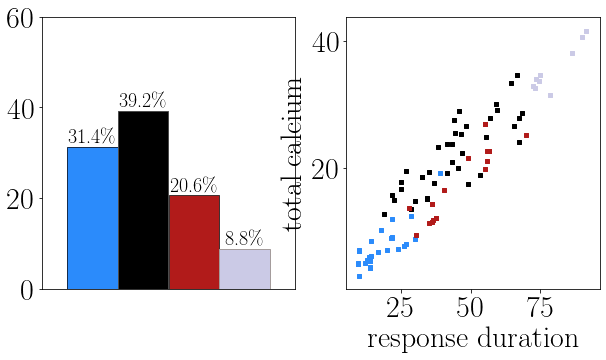

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
diversity_barchart(df2, ax=ax[0], legend=False)
diversity_dotplot(df2, ax=ax[1], legend=False)

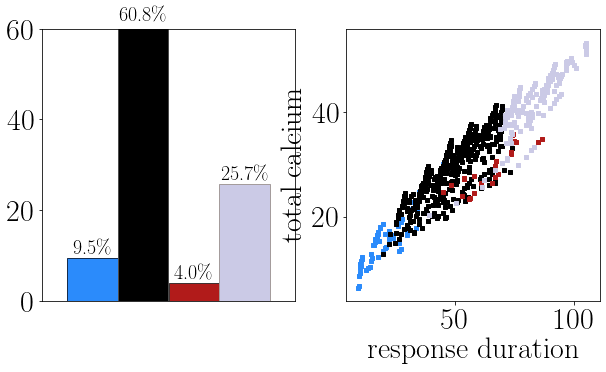

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
diversity_barchart(df3, ax=ax[0], legend=False)
diversity_dotplot(df3, ax=ax[1], legend=False)

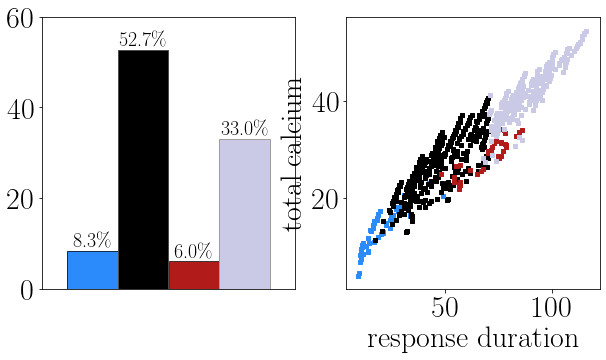

In [48]:
df = pickle.load(open('data/ca_diversity/calibrated/default', 'rb'))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
diversity_barchart(df, ax=ax[0], legend=False)
diversity_dotplot(df, ax=ax[1], legend=False)

## Effects of feedbacks and Gd1/Gd2

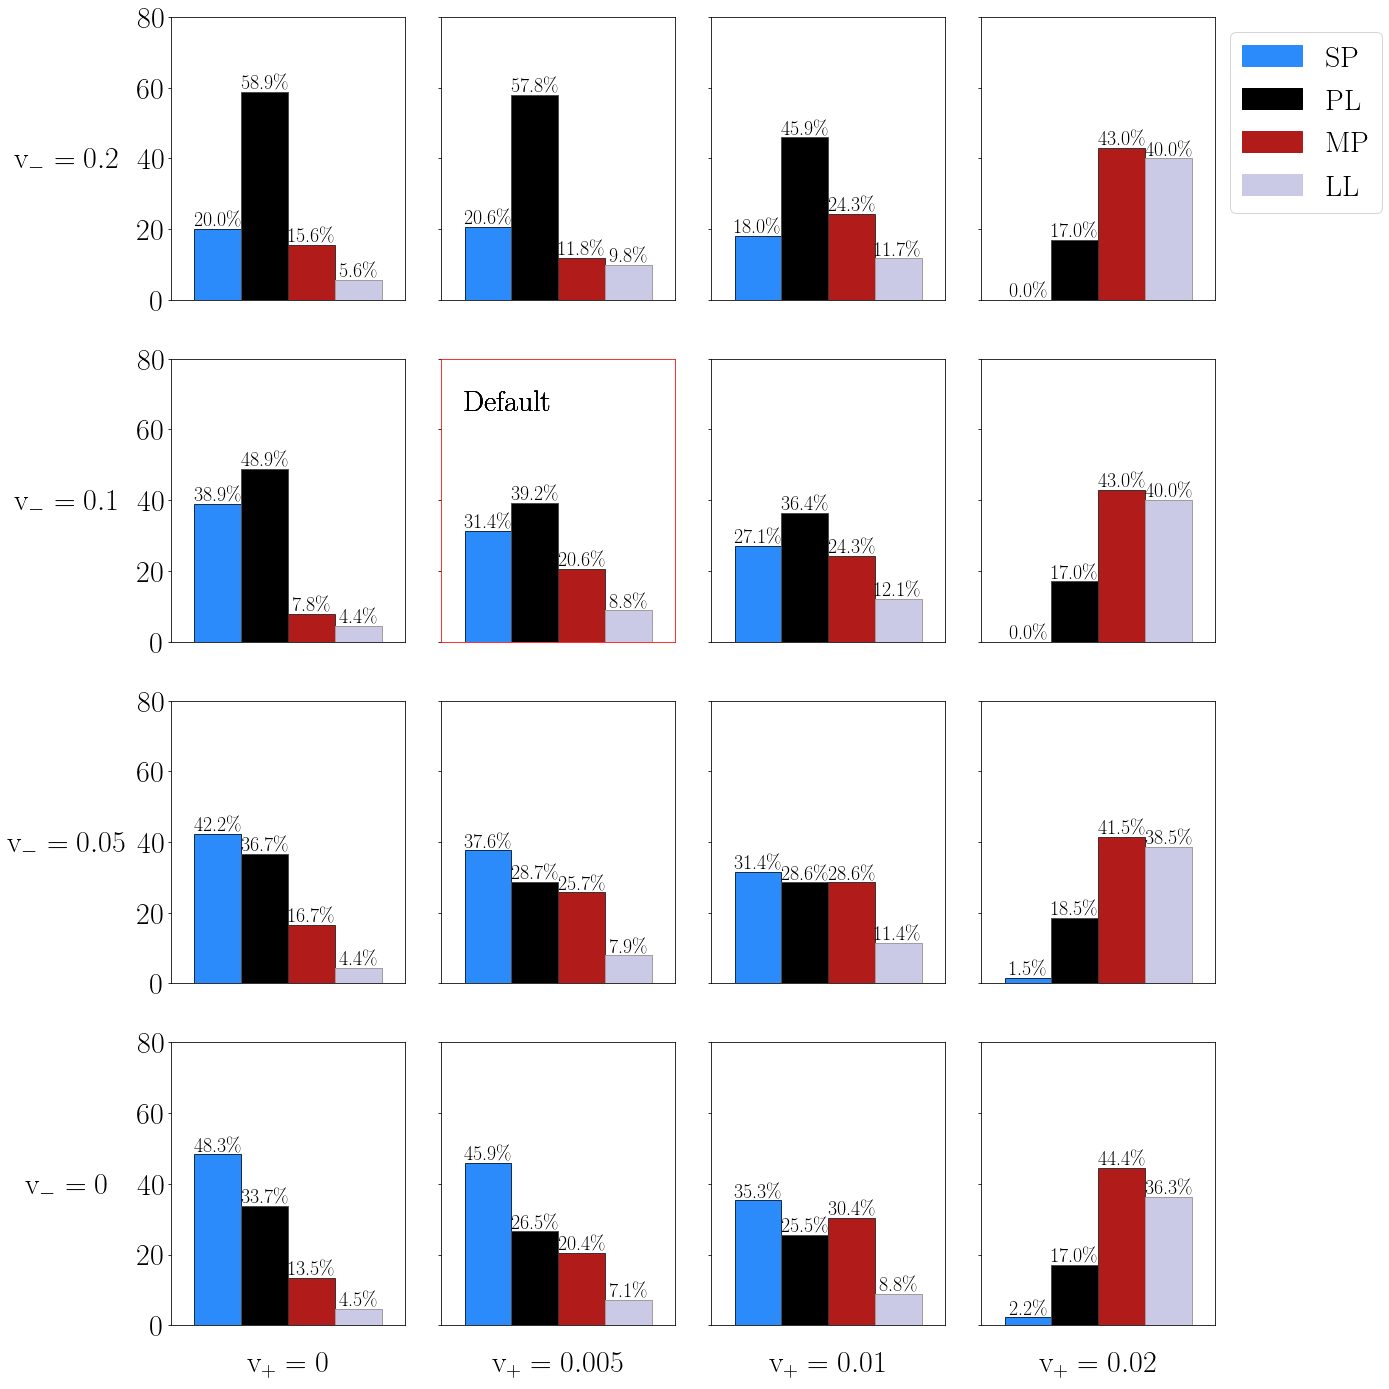

In [18]:
conditions = {
    'kd1': [0, 0.02, 0.04],
    'kd2': [0, 0.6, 1.2],
    'v_3k': [0, 0.05, 0.1, 0.2],
    'v_delta': [0, 0.005, 0.01, 0.02],
}

folder = 'data/ca_diversity/calibrated/'

#choose fixed conditions - uncomment two of the conditions
fixed = {
    'kd1': 0.02,
    'kd2': 1.2,
#     'v_3k': 0.1,
#     'v_delta': 0.005
}

#partial labels for each parameter type, insert value after and '$' after that to complete label
partial_labels = {
    'kd1': 'k$_d1=',
    'kd2': 'k$_d2=',
    'v_3k': 'v$_-=',
    'v_delta': 'v$_+=',
}

cond_types = []
for cond in conditions:
    if cond not in fixed:
        cond_types.append(cond)
        
m = len(conditions[cond_types[0]])
n = len(conditions[cond_types[1]])

fig, ax = plt.subplots(m, n, figsize=(n*5, m*5), sharey=True)

for i in range(m):
    for j in range(n):
        for cond in fixed:
            setattr(cfg, cond, fixed[cond])
        
        cond = cond_types[0]
        setattr(cfg, cond, conditions[cond][m-i-1])
        cond = cond_types[1]
        setattr(cfg, cond, conditions[cond][j])
        
        file = 'kd1_{}_kd2_{}_v3k_{}_vdelta_{}'.format(cfg.kd1, cfg.kd2, cfg.v_3k, cfg.v_delta)
        
        results = pd.read_pickle(folder + file)
        
        if i == 0 and j == n-1:
            diversity_barchart(results, ax=ax[i, j], legend=True, bbox_to_anchor=(1, 1), loc='upper left', ylim=80)
        else:
            diversity_barchart(results, ax=ax[i, j], legend=False, ylim=80)

for i in range(m):
    ax[i, 0].set_ylabel(partial_labels[cond_types[0]] + str(conditions[cond_types[0]][m-i-1]) + '$', 
                       rotation=0, ha='center', va='center', labelpad=70)
for j in range(n):
    ax[m-1, j].set_xlabel(partial_labels[cond_types[1]] + str(conditions[cond_types[1]][j]) + '$',
                         labelpad=30)
        
spines = ['top', 'bottom', 'left', 'right']
for spine in spines:
    ax[1, 1].spines[spine].set_color('red')
    ax[1, 1].text(-0.5, 65, 'Default', size=30)
        
plt.tight_layout()
plt.savefig(fig_folder + 'feedback_effects', bbox_inches='tight')

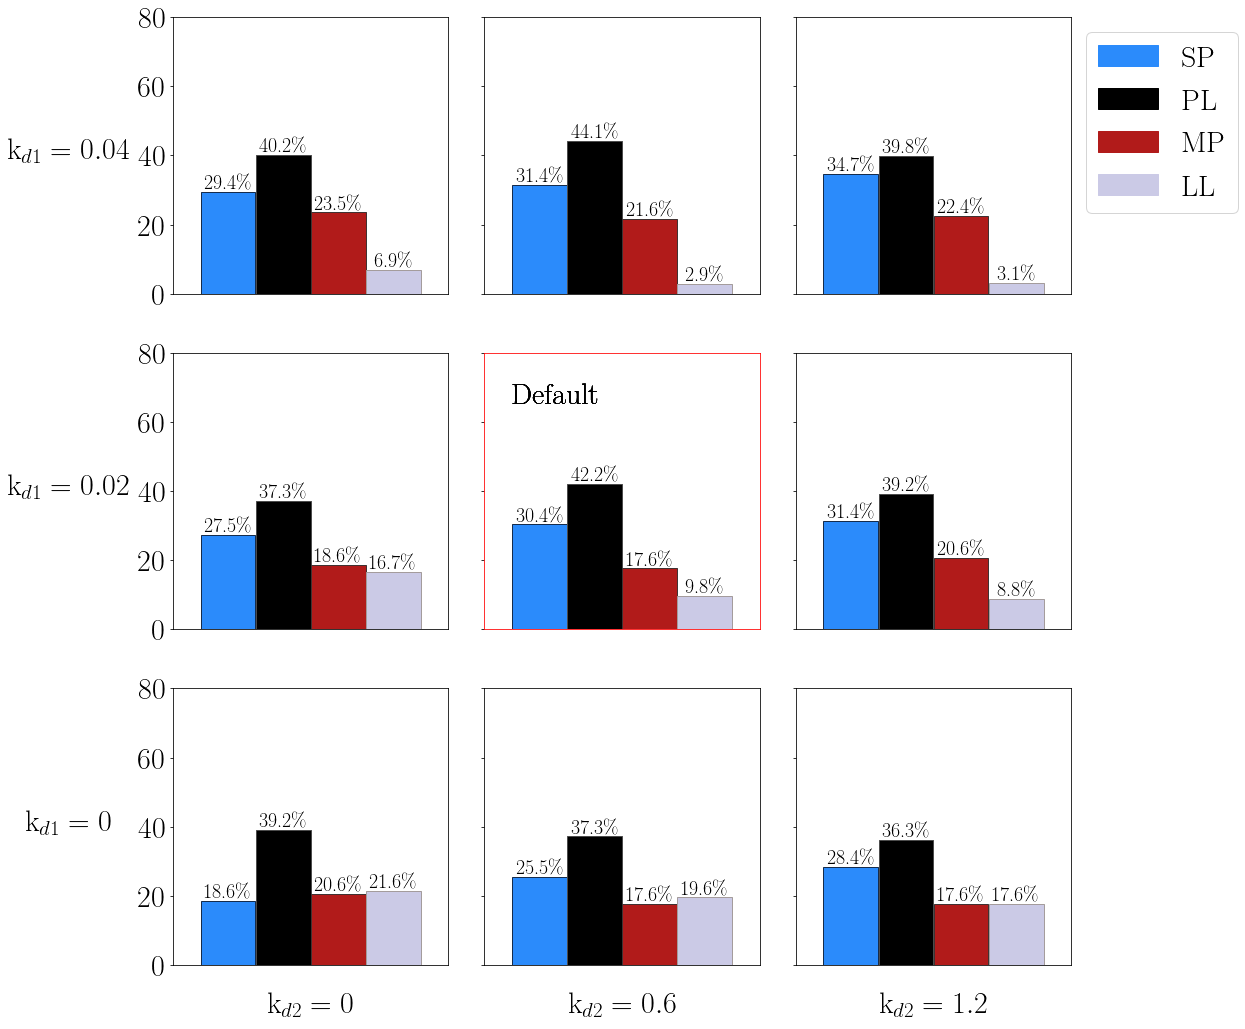

In [19]:
conditions = {
    'kd1': [0, 0.02, 0.04],
    'kd2': [0, 0.6, 1.2],
    'v_3k': [0, 0.05, 0.1, 0.2],
    'v_delta': [0, 0.005, 0.01, 0.02],
}

folder = 'data/ca_diversity/calibrated/'

#choose fixed conditions - uncomment two of the conditions
fixed = {
#     'kd1': 0.02,
#     'kd2': 0.6,
    'v_3k': 0.1,
    'v_delta': 0.005
}

#partial labels for each parameter type, insert value after and '$' after that to complete label
partial_labels = {
    'kd1': 'k$_{d1}=',
    'kd2': 'k$_{d2}=',
    'v_3k': 'v$_-=',
    'v_delta': 'v$_+=',
}

cond_types = []
for cond in conditions:
    if cond not in fixed:
        cond_types.append(cond)
        
m = len(conditions[cond_types[0]])
n = len(conditions[cond_types[1]])

fig, ax = plt.subplots(m, n, figsize=(n*6, m*5), sharey=True)

for i in range(m):
    for j in range(n):
        for cond in fixed:
            setattr(cfg, cond, fixed[cond])
        
        cond = cond_types[0]
        setattr(cfg, cond, conditions[cond][m-i-1])
        cond = cond_types[1]
        setattr(cfg, cond, conditions[cond][j])
        
        file = 'kd1_{}_kd2_{}_v3k_{}_vdelta_{}'.format(cfg.kd1, cfg.kd2, cfg.v_3k, cfg.v_delta)
        
        results = pd.read_pickle(folder + file)
        
        if i == 0 and j == n-1:
            diversity_barchart(results, ax=ax[i, j], legend=True, bbox_to_anchor=(1, 1), loc='upper left', ylim=80)
        else:
            diversity_barchart(results, ax=ax[i, j], legend=False, ylim=80)

for i in range(m):
    ax[i, 0].set_ylabel(partial_labels[cond_types[0]] + str(conditions[cond_types[0]][m-i-1]) + '$', 
                       rotation=0, ha='center', va='center', labelpad=70)
for j in range(n):
    ax[m-1, j].set_xlabel(partial_labels[cond_types[1]] + str(conditions[cond_types[1]][j]) + '$',
                         labelpad=30)
        
spines = ['top', 'bottom', 'left', 'right']
for spine in spines:
    ax[1, 1].spines[spine].set_color('red')
    ax[1, 1].text(-0.5, 65, 'Default', size=30)

        
plt.tight_layout()
plt.savefig(fig_folder + 'desensitization_effects', bbox_inches='tight')

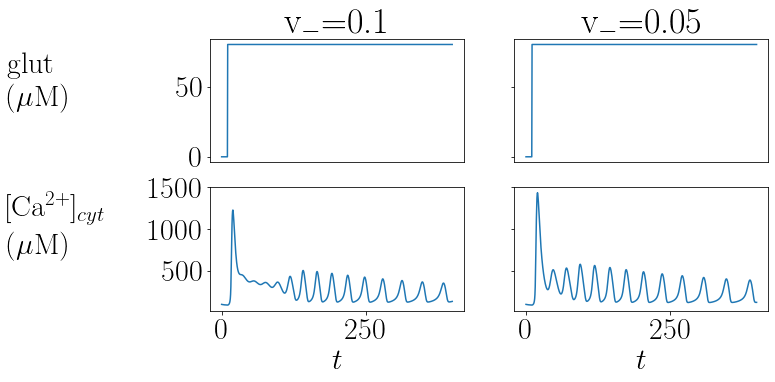

In [28]:
cfg.input_max = 0.08
cfg.input_duration = 1000
set_init('default')

fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharey='row')

cfg.v_3k = 0.1
ax[0, 0].set_title('v$_-$=0.1')
run_experiment('pulse', t_f=400, max_step=0.5)
plot_experiment_plots(['glut', 'c'], axs=ax[:, 0], ylabel_padding=[-0.8, 0.4])

cfg.v_3k = 0
ax[0, 1].set_title('v$_-$=0.05')
run_experiment('pulse', t_f=400, max_step=0.5)
plot_experiment_plots(['glut', 'c'], axs=ax[:, 1], add_ylabels=False)

plt.savefig('figures/paper_plots/diversity/delay_example.png', bbox_inches='tight')